In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

(576, 578, 3)


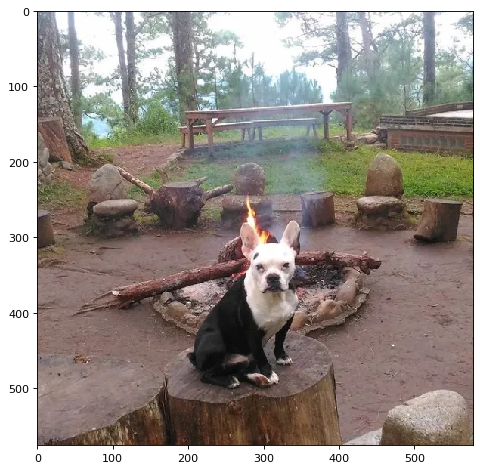

In [24]:
dog = imread('fire_dog.webp')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(dog);
print(dog.shape)

In [40]:
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])

gaussian_5x5 = (1/256.0)*np.array([[1., 4., 6., 4., 1.],
                                   [4., 16., 24., 16., 4.],
                                   [6., 24., 36., 24., 6.],
                                   [4., 16., 24., 16., 4.],
                                   ])
print(gaussian.shape)
# for edges in X axis
sobel_edge_kernel_x = np.array([[1., 2., 1.],
                              [0., 0., 0.],
                              [-1., -2., -1]])
# for edges in Y axis
sobel_edge_kernel_y = np.array([[1., 0., -1.],
                              [2., 0., -2.],
                              [1., 0., -1.]])



(3, 3)


(576, 578, 3)


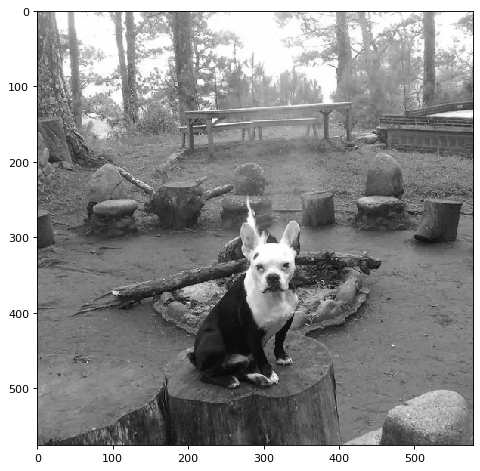

In [26]:
dog_grey = rgb2gray(dog)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(dog_grey);
print(dog.shape)

In [27]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

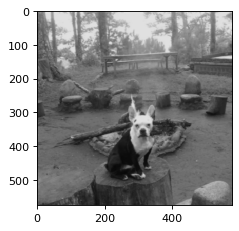

In [28]:
# convolved_image_3x3 = multi_convolver(dog_grey, gaussian, 2)
convolved_image_5x5 = multi_convolver(dog_grey, gaussian_5x5, 2)

plt.figure(num=None, figsize=(5,3), dpi=80)
# imshow(convolved_image_3x3);
imshow(convolved_image_5x5);

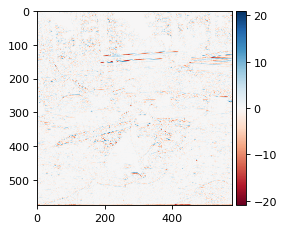

In [29]:
# convolved_image_3x3 = multi_convolver(dog_grey, gaussian, 2)
edges_x = multi_convolver(dog_grey, sobel_edge_kernel_x, 2)
plt.figure(num=None, figsize=(5,3), dpi=80)
# imshow(convolved_image_3x3);
imshow(edges_x);

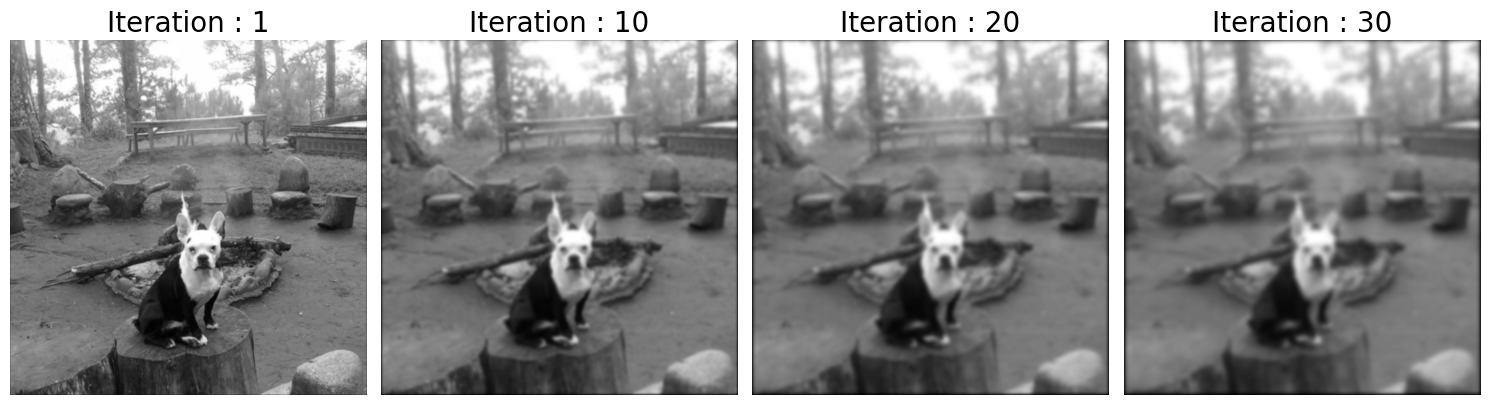

In [30]:
def convolution_plotter(image, kernel):
    iterations = [1,10,20,30]
    f_size = 20
    
    fig, ax = plt.subplots(1,4, figsize = (15,7))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Iteration : {iterations[n]}', fontsize =
                     f_size)
        ax.imshow(multi_convolver(image, kernel, iterations[n]), 
                  cmap='gray')
        ax.set_axis_off()
    fig.tight_layout()
    
convolution_plotter(dog_grey, gaussian)

(422, 542, 4)


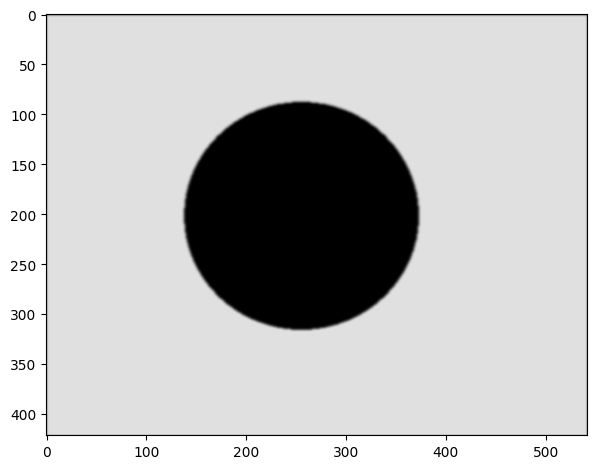

In [34]:
img =imread('images\circle.png')
print(img.shape)
img=img[:,:,0:3]
image = rgb2gray(img)
# plt.imshow(image)
imshow(image)
convolved_image_5x5 = multi_convolver(image, gaussian_5x5, 2)
imshow(convolved_image_5x5)

(485, 883, 4)


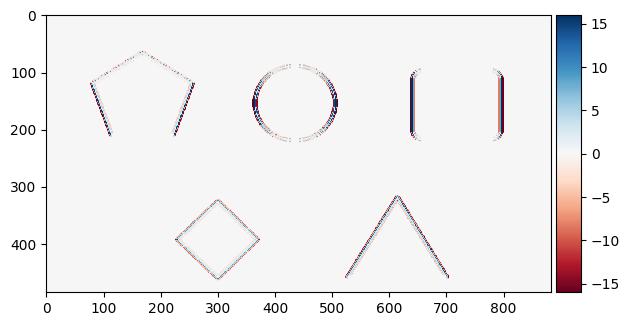

In [41]:
img =imread('images\shappes.png')
print(img.shape)
img=img[:,:,0:3]
image = rgb2gray(img)
# plt.imshow(image)
#imshow(image)
edges_x = multi_convolver(image, sobel_edge_kernel_y, 2)
imshow(edges_x)